In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stat
import pylab

In [2]:
data=pd.read_csv('delivery_time.csv')
data.sample(5)

,Delivery Time,Sorting Time
2,19.75,6
16,13.75,6
17,18.11,7
11,10.75,4
8,17.90,10


In [3]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [6]:
data.duplicated().any()

False

In [7]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

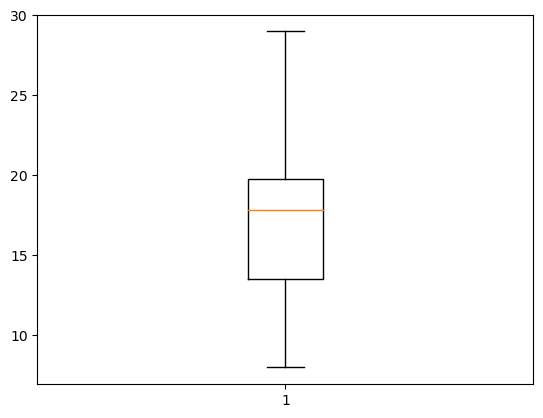

In [8]:
plt.boxplot(data['Delivery Time'])
plt.show()

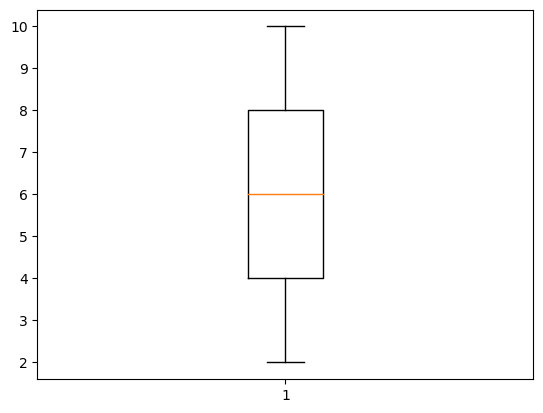

In [9]:
plt.boxplot(data['Sorting Time'])
plt.show()

## Trying transformation on sorting time 

In [10]:
## check whether feature is guassian or normal distributed
### using Q-Q plot

def plot_area(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

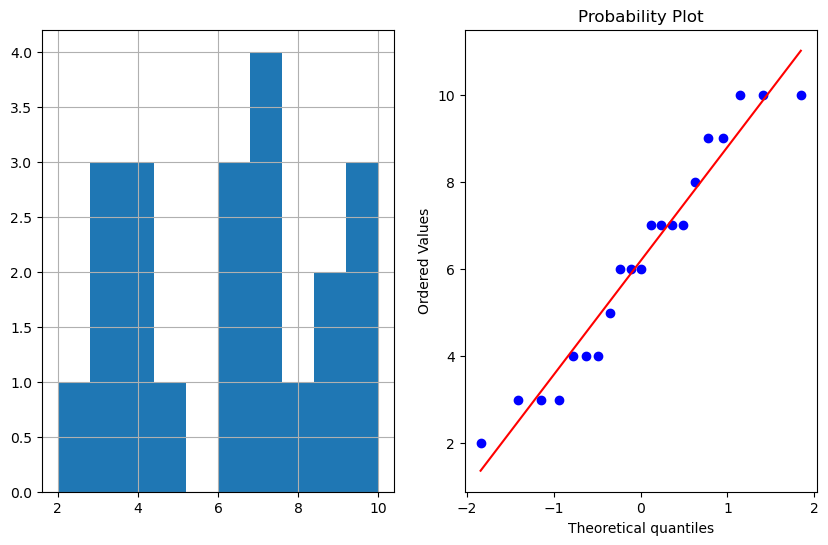

In [11]:
## normal
plot_area(data,'Sorting Time')

## logarthmic transformation

In [12]:
import numpy as np

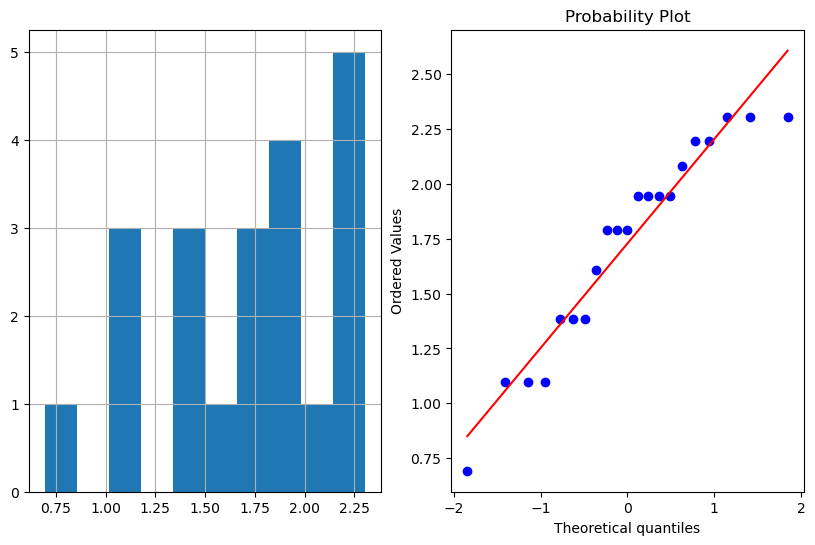

In [13]:
data['Sorting Time_log']=np.log(data['Sorting Time'])
plot_area(data,'Sorting Time_log')

## square root transformation

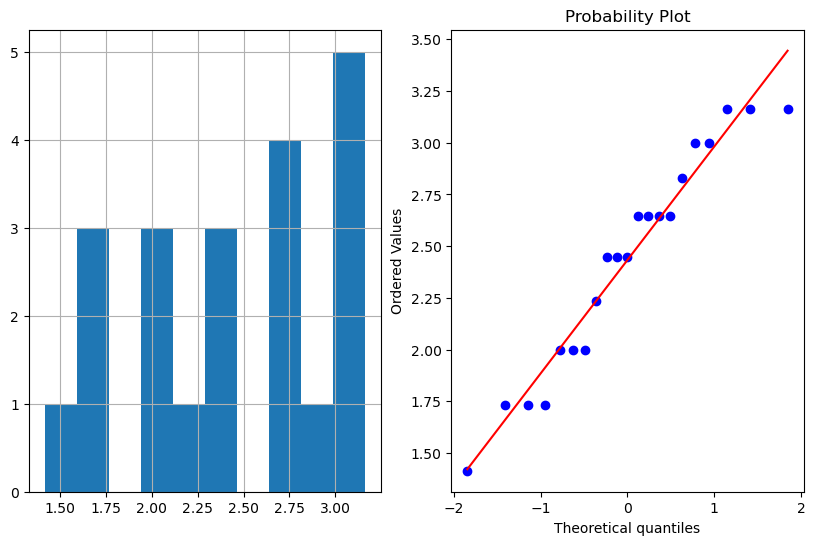

In [14]:
data['Sorting Time_sqrt']=np.sqrt(data['Sorting Time'])
plot_area(data,'Sorting Time_sqrt')

## exponential transformation

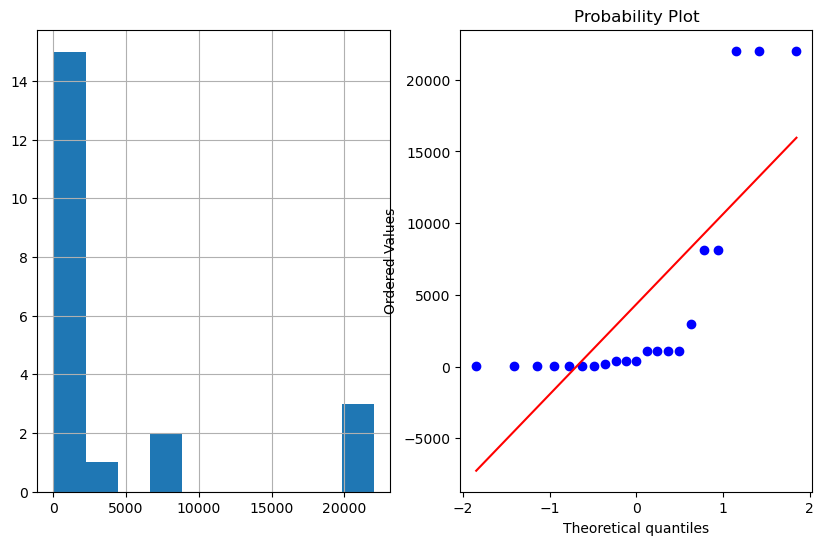

In [15]:
data['Sorting Time_exp']=np.exp(data['Sorting Time'])
plot_area(data,'Sorting Time_exp')

## Reciprocal Transformation

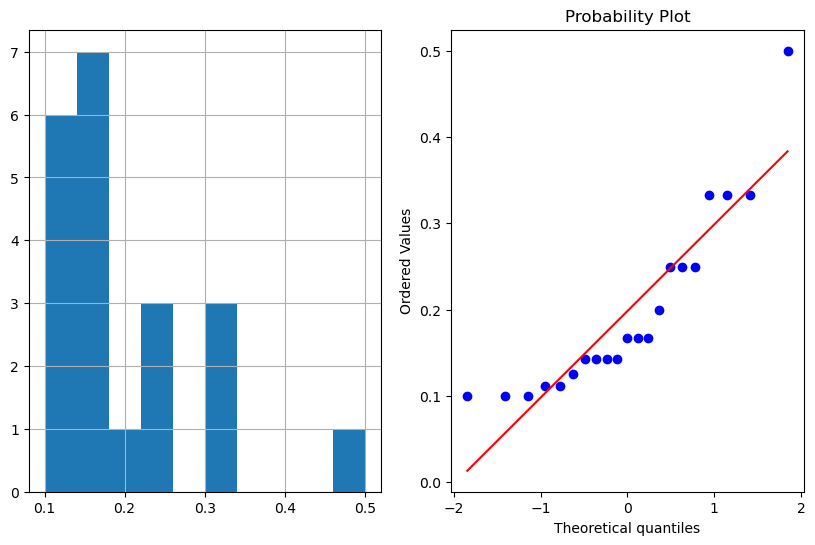

In [16]:
data['Sorting Time_rec']=1/data['Sorting Time']
plot_area(data,'Sorting Time_rec')

## boxcox Transformation

In [17]:
data['Sorting Time_box_cox'],parameters=stat.boxcox(data['Sorting Time'])
print(parameters)

0.6985665334706025


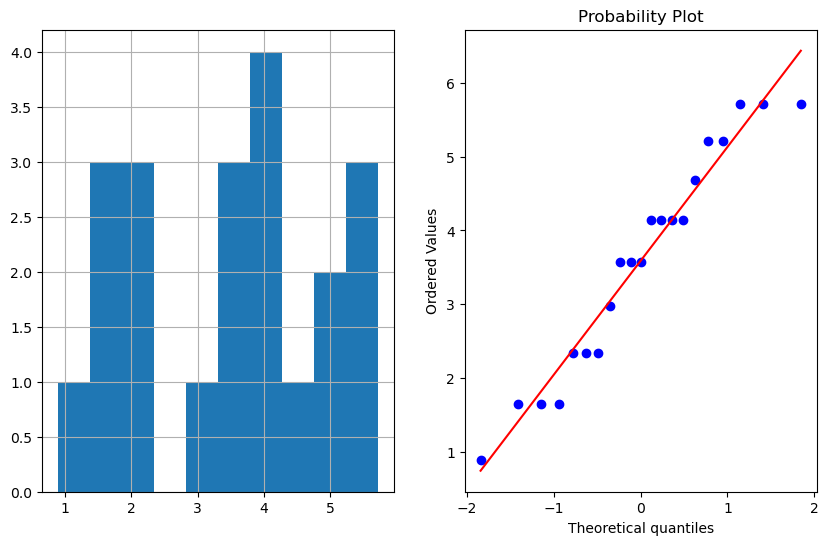

In [18]:
plot_area(data,'Sorting Time_box_cox')

### Observation
   from all the above transformations logarithmic transformation gives more accuracy to model

## dividing features and target

In [19]:
features=data[['Sorting Time_log']]

In [20]:
target=data['Delivery Time']

## Doing train test split

In [21]:
X_train, X_test, y_train, y_test =train_test_split(features,target,random_state=100,test_size=0.33)

In [22]:
print(X_train.shape)

(14, 1)


In [23]:
print(X_test.shape)

(7, 1)


## Model Building

In [24]:
lin_model=LinearRegression()

In [25]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [26]:
lin_model.predict(X_test)

array([ 6.57986483, 15.43715054, 13.28014282, 18.68964523, 10.49927619,
       18.68964523, 22.13742853])

## accuracy

In [27]:
lin_model.score(X_test,y_test)

0.72948557334198